In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [3]:
# Read in data
df = pd.read_csv('Reviews.csv')

print(df.shape)

(568454, 10)


In [4]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


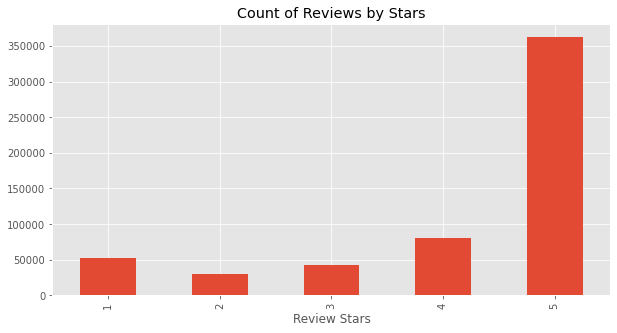

In [5]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [6]:


print("Original DataFrame:")
print(df)

# Filter rows with description length greater than 15 characters
df_long_desc = df[df['Text'].str.len() > 15]

# Drop duplicates in the filtered DataFrame
df_long_desc_no_duplicates = df_long_desc.drop_duplicates(subset='Text', keep='first')

# Remove the rows with long descriptions from the original DataFrame
df_filtered = df[df['Text'].str.len() <= 15]

# Concatenate the filtered rows and the rows with unique long descriptions
df_result = pd.concat([df_filtered, df_long_desc_no_duplicates], ignore_index=True)

print("\nDataFrame after dropping duplicates in 'description' column for descriptions longer than 15 characters:")
print(df_result)
df = df_result

Original DataFrame:
            Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  H

In [7]:
df_sorted = df.sort_values('HelpfulnessDenominator', ascending=False)
df_sorted.head(30)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
168208,207713,B00012182G,A1JUGIQDY6UYSM,"BabbChuck ""BabbChuck""",844,923,3,1252368000,Whole Rabbit - NOT!,"I ordered one of these Fresh ""Whole"" Rabbits, ..."
157272,190734,B000FI4O90,A1GQGYROVZVW49,P. Schmidt,866,878,5,1164672000,Works as Advertised - Classy Product,see update at end of review<br /><br />*******...
392577,566780,B001PQTYN2,A1QB2Y8GSME58Y,Benjamin Chodroff,808,815,5,1260748800,sauce not for mortals,I purchased a burrito from a small shop a few ...
186664,235723,B001F10XUU,A39V22BIBUMMB3,"Y. Hughes ""Notmyrealname""",580,593,1,1309564800,Lost in Translation: Truth,"This product is called ""Hunmatsu-RyokuCha,"" in..."
178305,222938,B000UUWECC,AU3GYRAKBUAEU,Jon Norris,491,569,3,1212278400,"not bad stuff, but I have serious questions",Coconut water is the liquid inside an unopened...
85482,96105,B00859FH7O,A1B4MIXYVIKMU2,"D. Truong ""Duke of New Mexico""",559,562,5,1314921600,Works great! But how does it compare to Solofi...,This Ecobrew reusable Keurig K-cup is great fo...
234451,303075,B005K0L2U2,A3RGPBC7HZA8V4,"EMC ""neelie klop""",538,544,5,1292284800,Money saver!!,"As a huge fan of Keurig brewing, I was delight..."
78760,88408,B001D0KG4Q,A1RCLICH0OO12,R. Hiltz,536,539,5,1185840000,"Good sampler, but what's included?",Good opportunity to sample some of the various...
157273,190735,B000FI4O90,A3KTISKYS55LQ7,"M. Boomgarden ""Mike B""",524,536,2,1188259200,A Nice Item That Makes a Horrible Racket,I bought an AeroGarden for my wife back in May...
274578,373777,B004WTHCO2,A233OPIX0YGN98,"ic ""ic""",488,496,5,1235520000,A Slacker Mom's dream,"I love this gadget. Compact, all-in-one, easy..."


In [8]:
median_score = df['HelpfulnessDenominator'].mean()
median_score

2.203707514882654

In [9]:
um_zero = (df['HelpfulnessDenominator'] == 0).sum()
um_zero

184496

In [10]:
df['HelpfulnessRatio'] = df.apply(lambda row: row['HelpfulnessNumerator'] / row['HelpfulnessDenominator'] if row['HelpfulnessDenominator'] != 0 else -1, axis=1)

(-1.0, -0.6]         0
(-0.6, -0.2]         0
(-0.2, 0.2]      25317
(0.2, 0.6]       25011
(0.6, 1.0]      158753
(1.0, 1.4]           0
(1.4, 1.8]           1
(1.8, 2.2]           0
(2.2, 2.6]           0
(2.6, 3.0]           1
Name: HelpfulnessRatio, dtype: int64


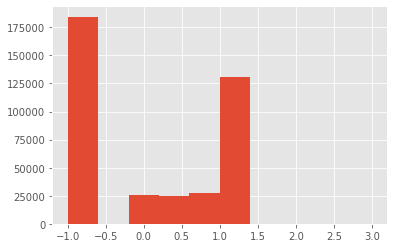

In [11]:
hist, bins, _ = plt.hist(df['HelpfulnessRatio'])

# Get the count of rows in each bin
bin_counts = pd.cut(df['HelpfulnessRatio'], bins=bins).value_counts(sort=False)

# Print the bin counts
print(bin_counts)

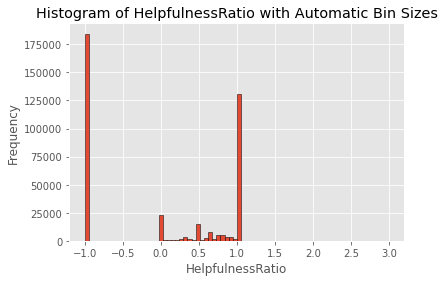

Bin 1: Range (-1.0, -0.9459459459459459), Rows: 184496
Bin 2: Range (-0.9459459459459459, -0.8918918918918919), Rows: 0
Bin 3: Range (-0.8918918918918919, -0.8378378378378378), Rows: 0
Bin 4: Range (-0.8378378378378378, -0.7837837837837838), Rows: 0
Bin 5: Range (-0.7837837837837838, -0.7297297297297297), Rows: 0
Bin 6: Range (-0.7297297297297297, -0.6756756756756757), Rows: 0
Bin 7: Range (-0.6756756756756757, -0.6216216216216216), Rows: 0
Bin 8: Range (-0.6216216216216216, -0.5675675675675675), Rows: 0
Bin 9: Range (-0.5675675675675675, -0.5135135135135135), Rows: 0
Bin 10: Range (-0.5135135135135135, -0.45945945945945943), Rows: 0
Bin 11: Range (-0.45945945945945943, -0.4054054054054054), Rows: 0
Bin 12: Range (-0.4054054054054054, -0.3513513513513513), Rows: 0
Bin 13: Range (-0.3513513513513513, -0.29729729729729726), Rows: 0
Bin 14: Range (-0.29729729729729726, -0.2432432432432432), Rows: 0
Bin 15: Range (-0.2432432432432432, -0.18918918918918914), Rows: 0
Bin 16: Range (-0.189189

In [12]:
plt.hist(df['HelpfulnessRatio'], bins='auto', edgecolor='black')
plt.xlabel('HelpfulnessRatio')
plt.ylabel('Frequency')
plt.title('Histogram of HelpfulnessRatio with Automatic Bin Sizes')
plt.show()

# Print the amount of rows in each bin
counts, bin_edges = np.histogram(df['HelpfulnessRatio'], bins='auto')
for i in range(len(counts)):
    print(f"Bin {i+1}: Range ({bin_edges[i]}, {bin_edges[i+1]}), Rows: {counts[i]}")

In [13]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio
0,453669,B0001QYYUK,A3S7N11XRRTUU6,Bob,5,14,1,1136246400,Not worth it,Not worth it,0.357143
1,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.000000
2,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.000000
3,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.000000
4,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
393574,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,-1.000000
393575,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,-1.000000
393576,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.000000
393577,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,1.000000


In [14]:
from math import sqrt

def wilson_lower_bound(helpful_votes, total_votes, confidence=0.95):
    """
    Calculate the lower bound of Wilson Score Interval.
    
    helpful_votes: int, number of helpful votes (helpfulnessNominator)
    total_votes: int, total number of votes (helpfulnessDenominator)
    confidence: float, the desired confidence level (default: 0.95)
    
    Returns the lower bound of Wilson Score Interval as a float.
    """
    if total_votes == 0:
        return 0
    z = 1.96  # z-score for 95% confidence interval
    phat = float(helpful_votes) / total_votes
    inner_sqrt = (phat * (1 - phat) + z**2 / (4 * total_votes)) / total_votes
    if inner_sqrt < 0:
        inner_sqrt = 0  # Prevent math domain error
    denominator = 1 + z**2/total_votes
    numerator = phat + z**2 / (2 * total_votes) - z * sqrt(inner_sqrt)
    return numerator / denominator

In [15]:
df['wilson_score'] = df.apply(lambda row: wilson_lower_bound(row['HelpfulnessNumerator'], row['HelpfulnessDenominator']), axis=1)

# Set a threshold for wilson_score to filter out low helpfulness reviews
threshold = 0.15
filtered_df = df[df['wilson_score'] >= threshold]

# You can also sort the DataFrame by the Wilson Score
sorted_df = df.sort_values(by='wilson_score', ascending=False)

In [16]:
filtered_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,wilson_score
0,453669,B0001QYYUK,A3S7N11XRRTUU6,Bob,5,14,1,1136246400,Not worth it,Not worth it,0.357143,0.163445
1,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.000000,0.206543
3,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.000000,0.206543
4,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.000000,0.438494
9,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.000000,0.206543
...,...,...,...,...,...,...,...,...,...,...,...,...
393565,568441,B005ZC0RRO,A2TO5R8QLIITEF,SAK,1,1,5,1323734400,"Delicious, all natural and allergy free treats!",Indie Candy's gummies are absolutely delicious...,1.000000,0.206543
393569,568445,B001EO7N10,A2SD7TY3IOX69B,"BayBay ""BayBay Knows Best""",3,3,5,1245369600,Best Value for Chinese 5 Spice,"As a foodie, I use a lot of Chinese 5 Spice po...",1.000000,0.438494
393570,568446,B001EO7N10,A2E5C8TTAED4CQ,S. Linkletter,2,2,5,1268006400,Five Spice Powder,"You can make this mix yourself, but the Star A...",1.000000,0.342372
393576,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.000000,0.342372
